# IAB303 - Assignment 1 - Part B

## Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = 'Quoc Huy'
last_name = 'Nguyen'
student_number = 'n10289020'

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---
## BUSINESS CONCERN

An eco-tourism business is considering starting a tour for spotting wild Australian native wildlife around Brisbane. They are thinking that Koala spotting maybe a good way to start.

## QUESTION 1

#### Question: 

Using the occurance records from Atlas of Living Australia, perform an appropriate search and download a CSV file to analyse for recent sightings of Koalas around Brisbane. Use Data Analytics to answer the following question: Is it possible to find Koalas reliably around Brisbane in order to support a tour? 

#### Data:

[Atlas of Living Australia](https://biocache.ala.org.au/#tab_simpleSearch)

*To download data, login with AAF, QUT as organisation, and select Education as reason for use.*


In [10]:
# import libraries for this question here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### 1.1 Question

The business wants see if there is a sufficient ocurrences of koalas around Brisbane to start a wild Australian native wildlife spotting tour. The strategy is to compare the number koala spotted in Brisbane with other nearby regions. The question can be broken down into small parts:

- What is the proportion of koala spotted occurances in Brisbane compared to other regions in Queensland?
- Can koalas in Brisbane be spotted regularly? Which months of the year that koalas are spotted the most?

Anwsering these questions can help decide whether or not to establish the tour and analyze the time and location factors.

### 1.2 Data

In [3]:
# Import the data
# Clean/prepare the data for analysis
occurences_df = pd.read_csv('records-2021-08-29.csv')

D:\Things\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,5,7,8,9,10,11,12,13,14,15,19,20,21,22,23,27,28,29,30,33,35,38,39,42,43,46,49,50,54,55,56,57,61,62,63,71,72,74,84,90,92,94,95,96,97,99,101,102,103,106,107,108,109,110,111,112,113,114,118,121,123,131,132,137,143,151,152,154,165) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
occurences_df.head()

dataResourceUid images dcterms:modified dcterms:language  dcterms:license  \
0          dr1008    NaN              NaN              NaN            CC-BY   
1          dr1008    NaN              NaN              NaN            CC-BY   
2          dr1132    NaN              NaN              NaN  CC-BY 4.0 (Int)   
3          dr1132    NaN              NaN              NaN  CC-BY 4.0 (Int)   
4          dr1132    NaN              NaN              NaN  CC-BY 4.0 (Int)   

  rightsHolder  dcterms:accessRights dcterms:bibliographicCitation references  \
0          NaN                   NaN                           NaN        NaN   
1          NaN                   NaN                           NaN        NaN   
2          NaN                   NaN                           NaN        NaN   
3          NaN                   NaN                           NaN        NaN   
4          NaN                   NaN                           NaN        NaN   

  institutionID  ...  verbatimScientificName verbatimContinent measurementID  \
0           NaN  ...  Phascolarctos cinereus               NaN           NaN   
1           NaN  ...  Phascolarctos cinereus               NaN           NaN   
2          2841  ...  Phascolarctos cinereus               NaN           NaN   
3           NaN  ...  Phascolarctos cinereus               NaN           NaN   
4          1881  ...  Phascolarctos cinereus               NaN           NaN   

  measurementType measurementUnit measurementDeterminedBy measurementAccuracy  \
0             NaN             NaN                     NaN                 NaN   
1             NaN             NaN                     NaN                 NaN   
2             NaN             NaN                     NaN                 NaN   
3             NaN             NaN                     NaN                 NaN   
4             NaN             NaN                     NaN                 NaN   

   relatedResourceID  images.1 dcterms:type  
0                NaN       NaN          NaN  
1                NaN       NaN          NaN  
2                NaN       NaN          NaN  
3                NaN       NaN          NaN  
4                NaN       NaN          NaN  

[5 rows x 166 columns]

The dataset contains the occurence records of Koalas in Queensland. There are **18051** rows with **166** columns. The description of each columns can be found in the file **heading.csv**. In our analysis, we only care about the coordinates, and date time of the human observations ocurrences.

In [5]:
rows = ['year', 'month', 'day', 'decimalLatitude', 'decimalLongitude', 'basisOfRecord']
cleaned_df = occurences_df[rows]
cleaned_df = cleaned_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
# Only human observation
cleaned_df = cleaned_df[(cleaned_df['basisOfRecord'] == 'HUMAN_OBSERVATION') | (cleaned_df['basisOfRecord'] == 'OBSERVATION')]
cleaned_df.shape

(15892, 6)

### 1.3 Analysis

In [6]:
# Analyse the data - ensure that you at least use the required technique
# Which month is best to spot koalas in Brisbane?
month_df = cleaned_df.groupby(['month'])['month'].count()
month_df

month
1.0      360
2.0      381
3.0      303
4.0      619
5.0      585
6.0      319
7.0      507
8.0      544
9.0      474
10.0     974
11.0    1090
12.0     361
Name: month, dtype: int64

### 1.4 Visualisation

Text(0.5, 1.0, 'Figure 1: Occurence of Koala witnessed by human in Queensland')

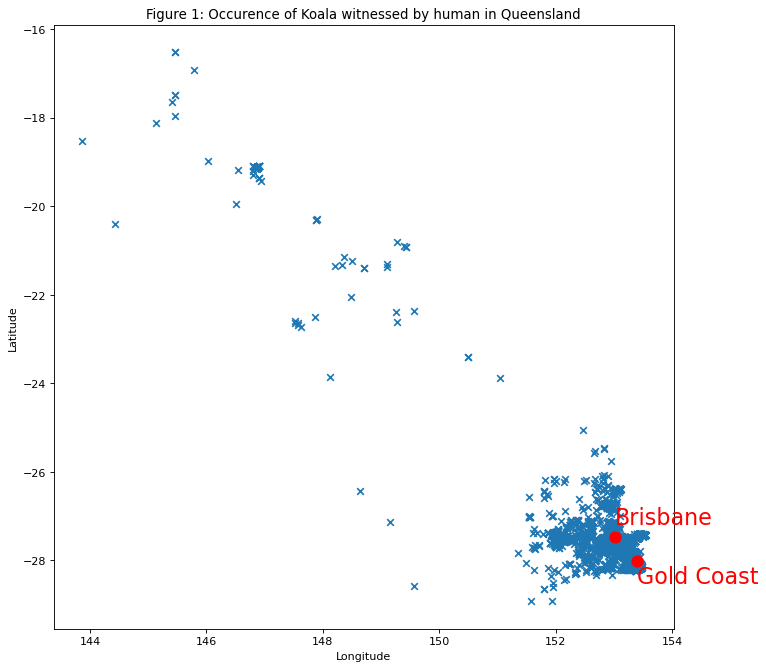

In [7]:
Brisbane = [-27.470125, 153.021072] # Coordinates of Brisbane
GoldCoast = [-28.016666, 153.399994] # Coordinates of Gold Coast
figure(figsize=(10, 10), dpi=80)
plt.scatter(x=cleaned_df['decimalLongitude'], y=cleaned_df['decimalLatitude'], marker='x')
plt.scatter(y=Brisbane[0], x=Brisbane[1], color='red', s=100)
plt.annotate('Brisbane', (Brisbane[1], Brisbane[0]), c='red', textcoords="offset points", xytext=(0,np.sqrt(500)/2), fontsize=20)
plt.scatter(y=GoldCoast[0], x=GoldCoast[1], color='red', s=100)
plt.annotate('Gold Coast', (GoldCoast[1], GoldCoast[0]), c='red', textcoords="offset points", xytext=(0,-np.sqrt(1500)/2), fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Figure 1: Occurence of Koala witnessed by human in Queensland')

Text(0.5, 1.0, 'Figure 2: Monthly occurences of Koala in Brisbane')

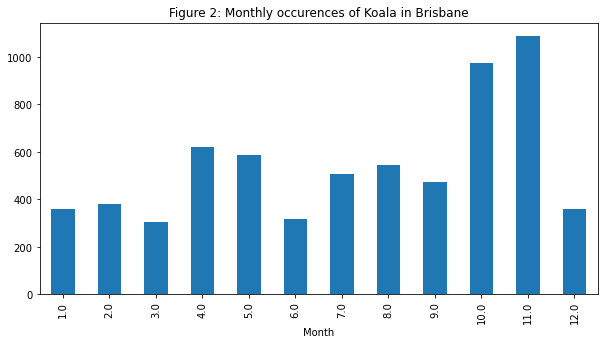

In [8]:
# Visualise the results
# Monthly count
month_df.plot(kind='bar',figsize=(10,5),legend=None)
plt.xlabel('Month')
plt.title('Figure 2: Monthly occurences of Koala in Brisbane')

### 1.5 Insight

As we can see in the **Figure 1**, most of the Koala human observations are highly concentrated in Brisbane and Gold Coast areas. This indicates that there might be sufficient occurences so that the business can establish a tour in Brisbane. Gold Coast can also be another good options. 

**Figure 2** shows that October and November are the months that observe Koala the most. April an May can also be considered, but the likelihood might decrease. 

Overall, the business can start a tour around Brisbane area or Gold Coast in October or November to maximize the probability of spotting koalas.

---
## QUESTION 2

#### Question: 
Using the *Twitter* API, search for who is using `#koala` and address the question: Who might be potential promotors of the business or possible competitors? 

#### Data access:
[Twitter Development Portal](https://developer.twitter.com/en/portal/projects-and-apps)


In [2]:
# import libraries for this question here
import json
import tweepy

### 2.1 Question

The business wants to find the potential promoters by extract insights from users who have tweeted about koala. In this analysis, we will select promoters based on their activity and connections in Twitter. A good candidate should have sufficient number of followers with a genuine profile proven by number of tweets, friends, and favourites they have.

### 2.2 Data

In [3]:
# Access the data via API
# Clean/prepare the data for analysis
my_secrets = "twitter_credentials.json"
with open(my_secrets,'r') as file:
    credentials = json.load(file)
auth = tweepy.OAuthHandler(credentials['api_key'], credentials['api_secret_key'])
auth.set_access_token(credentials['access_token'], credentials['access_token_secret'])
twitter = tweepy.API(auth)

In [4]:
tweets = []
# --- This should only srun once because the result is different everytime.

# for status in tweepy.Cursor(twitter.search, q="#koala",count=100, lang = "en", include_entities=True).items(1000):
#     tweets.append(status._json)

In [7]:
## Save tweets to json file
output = {}
output['tweets'] = tweets
with open('tweets.json', 'w') as outfile:
    json.dump(output, outfile)

The Twitter API gives us 1000 tweets that has the tag **#koala**. Based on the assumption that people tweeted about this might be interested in koala, we collect the profile of each user.

In [11]:
## Read tweets from json
with open('tweets.json') as json_file:
    data = json.load(json_file)
    tweets = data['tweets']

In [12]:
df = {
    'screen_name':[],
    'location': [],
    'followers_count': [],
    'friends_count': [],
    'favourites_count': [],
    'verified': [],
    'statuses_count':[]
}
for tweet in tweets:
    df['screen_name'].append(tweet['user']['screen_name'])
    df['location'].append(tweet['user']['location'])
    df['followers_count'].append(tweet['user']['followers_count'])
    df['friends_count'].append(tweet['user']['friends_count'])
    df['favourites_count'].append(tweet['user']['favourites_count'])
    df['verified'].append(tweet['user']['verified'])
    df['statuses_count'].append(tweet['user']['statuses_count'])
user_df = pd.DataFrame(df)

In [13]:
user_df.shape

(1000, 7)

In [14]:
user_df.head()

screen_name            location  followers_count  friends_count  \
0       steve_7an           singapore             1093           3354   
1     johnnie6111                                 1647           1250   
2  millennialmaxi                                  406            642   
3         JamF110                                  185            341   
4       jacknjill  Australia, UK, USA             3373           1204   

   favourites_count  verified  statuses_count  
0             29100     False           31532  
1             17982     False            8657  
2               493     False             730  
3               133     False             146  
4               598     False            2547

In [15]:
user_df['followers_count'].describe()

count      1000.000000
mean       4220.463000
std       13666.000345
min           0.000000
25%         165.500000
50%         643.500000
75%        2165.250000
max      183785.000000
Name: followers_count, dtype: float64

### 2.3 Analysis

In [16]:
# Analyse the data - ensure that you at least use the required technique
# Get the top 10 most followers user
top_10_followers = user_df.sort_values('followers_count', ascending=False).head(10)
top_10_followers

screen_name         location  followers_count  friends_count  \
766       peac4love                            183785         183501   
267     myworld2121  Toscana, Italia           136272          89607   
417  AndreiAndrei63                            132938         103026   
190  AndreiAndrei63                            132938         103026   
767    AlteaFerrari                            110742         105175   
210     fukushima36         神田ふくしま歯科            96991         105251   
105       BgSnezana           Europe            85900          81994   
263      SonokHakan   Планета сатурн            69307          75868   
765      SonokHakan   Планета сатурн            69307          75868   
841    marie_nassar                             69293          60006   

     favourites_count  verified  statuses_count  
766            889709     False          668581  
267             74362     False           85459  
417            529646     False         1103937  
190            529646     False         1103937  
767            591773     False          373122  
210            524756     False          481872  
105            352505     False          422354  
263            146132     False          839174  
765            146132     False          839174  
841            377764     False          622226

We analyze the top 10 uses that have the most number of followers.

### 2.4 Visualisation

Text(0.5, 1.0, 'Statuses Count')

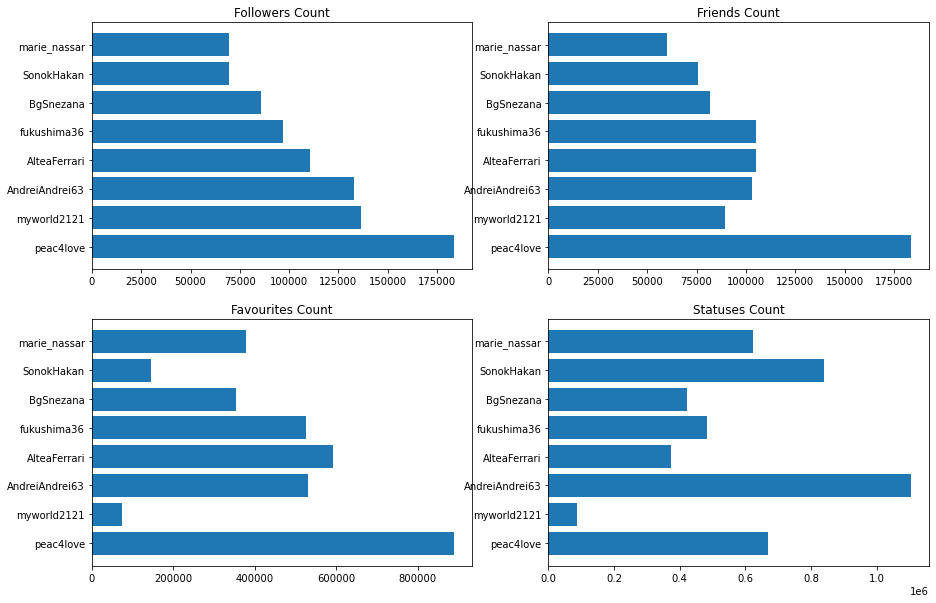

In [17]:
# Visualise the results
fig, axs = plt.subplots(2,2,figsize=(15, 10))
axs[0, 0].barh(top_10_followers['screen_name'],top_10_followers['followers_count'])
axs[0, 0].set_title('Followers Count')
axs[0, 1].barh(top_10_followers['screen_name'],top_10_followers['friends_count'])
axs[0, 1].set_title('Friends Count')
axs[1, 0].barh(top_10_followers['screen_name'],top_10_followers['favourites_count'])
axs[1, 0].set_title('Favourites Count')
axs[1, 1].barh(top_10_followers['screen_name'],top_10_followers['statuses_count'])
axs[1, 1].set_title('Statuses Count')

In [22]:
# Analyse Australia and AndreiAndrei63
peac4love = twitter.get_user(screen_name='peac4love')._json
Andrei = twitter.get_user(screen_name='AndreiAndrei63')._json
myworld2121 = twitter.get_user(screen_name='myworld2121')._json

In [23]:
compare_df = {
    'screen_name': [peac4love['screen_name'], Andrei['screen_name'], myworld2121['screen_name']],
    'location': [peac4love['location'], Andrei['location'], myworld2121['location']],
    'description': [peac4love['description'], Andrei['description'], myworld2121['description']],
    'followers_count': [peac4love['followers_count'], Andrei['followers_count'], myworld2121['followers_count']],
    'favourites_count': [peac4love['favourites_count'], Andrei['favourites_count'], myworld2121['favourites_count']],
    'friends_count': [peac4love['friends_count'], Andrei['friends_count'], myworld2121['friends_count']],
    'statuses_count': [peac4love['statuses_count'], Andrei['statuses_count'], myworld2121['statuses_count']],
    'verified': [peac4love['verified'], Andrei['verified'], myworld2121['verified']],
}
pd.DataFrame(compare_df)

screen_name         location  \
0       peac4love                    
1  AndreiAndrei63                    
2     myworld2121  Toscana, Italia   

                                         description  followers_count  \
0  ✨☮peace☮✨♥love♥✨🌈📷🚲📚🛠🎨 Arts & Architecture🏦 ✨🌻...           183785   
1  Believe that life is worth living, and your be...           132937   
2  Animals, especially dogs.  Parachuting sport (...           136272   

   favourites_count  friends_count  statuses_count  verified  
0            889709         183501          668581     False  
1            529646         103026         1103937     False  
2             74362          89607           85459     False

### 2.5 Insight

The user that has the most number of followers is **peac4love**. Business can also consider another user **AndreiAndrei63** who has a fair number of followers and highly active. Looking at the description of each account, none of them seems to be dedicated to promote Australian Tourism. Even though **myworld2121** has a large amount of followers, the account appears to be less active than the other two. Also the location of **myworld2121** is in Italy. This is also be taken into account since the business is focusing of the Australia market.